# Hypothesis testing
In science, we are typically interested in debunking a hypothesis in favor of another one. For example, prior to the pandemic, streaming platform users were watching shows for eight hours per week on average. If we suspect that the average watch time changed during the pandemic, we would have to sample multiple users to prove that what we observed is incompatible with the original hypothesis. That is, we want to show that the average watch time is not eight hours per week. To achieve this, statisticians recur to hypothesis testing.

In order to test some statistical hypothesis, which we call the null hypothesis, we do an experiment following this procedure:
1. State the null hypothesis, $H_0$. This is the status quo and we are interested in disproving this in favor of an alternative hypothesis, $H_1$.
2. Consider all possible results of the experiment and divide them in such a way that the probability of obtaining a result in the rejection class when the null hypothesis is true is equal to some small, pre-assigned value called the level of significance, denoted by $\alpha$. The two classes in which we will :
    1. The acceptance class. The events in this region account for $1 - \alpha$ of all possible outcomes
    2. The rejection class. The events in this region accounts for $\alpha$ of all possible outcomes

3. Sample the population of interest to obtain the metric from $H_0$. Assuming that the null hypothesis is true, this metric is a random observation from the distribution stated in $H_0$.
4. If the observed result lies in the acceptnce class we accept the null hypothesis. Otherwise, we reject it in favor of the alternative hypothesis. 

To illustrate this, consider the null hypothesis that some coin is unbiased and will consequently follow a binomial distribution with probability of success $P = \frac{1}{2}$. Suppose we have reason to suspect that the coin is not unbiased, so we flip it 100 times to test if the observed number of heads could have come from a binomial distribution with $P = \frac{1}{2}$.

$H_0: P = \frac{1}{2}$

$H_1: P \neq \frac{1}{2}$

In [1]:
# Set local environment
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

# Declare distribution under the assumption that H_0 is true
X = stats.binom(n=100, p=0.5)

# Set significance level
alpha = 0.05

If the coin is unbiased, its probability mass function look as follows:

No handles with labels found to put in legend.


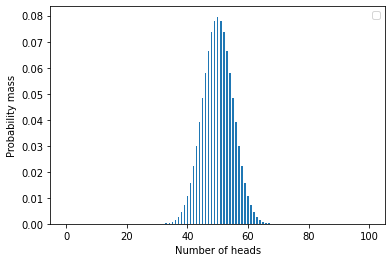

In [2]:
# Number of successes in 100 throws
x = np.arange(start=0, stop=101)

# Plot binomial distribution under H_0
plt.bar(x, X.pmf(x), width=0.5, align='center')

# Styling
plt.legend()
plt.xlabel('Number of heads')
plt.ylabel('Probability mass')
plt.show()

Now that we considered have all possible results, we must establish the rejection region. The rejection region will account for $\alpha \times 100$ percent of all possible outcomes. Recall that our alternative hypothesis is that $P \neq \frac{1}{2}$, so we must reject $H_0$ if the observed outcome is either too small or to great. This is known as a two-tailed test.

Number of heads below which we will reject H_0: 40.0
Number of heads above which we will reject H_0: 60.0


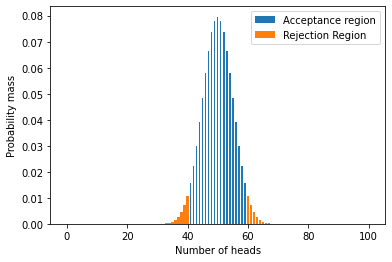

In [3]:
# Find the critical number of successes BELOW which the result will be deemed "too few"
left_bound = X.ppf(alpha / 2)
print('Number of heads below which we will reject H_0:', left_bound)

# Find the critical number of successes ABOVE which the result will be deemed "too many"
right_bound = X.ppf(1 - alpha / 2)
print('Number of heads above which we will reject H_0:', right_bound)

# Establish the number of successes in the rejection region
x_rejection = np.union1d(np.arange(start=0, stop=left_bound + 1),
                        np.arange(start=right_bound, stop=100 + 1))

# Plot previous graph and add rejection region
plt.bar(x, X.pmf(x), width=0.5, align='center', color='C0', label='Acceptance region')
plt.bar(x_rejection, X.pmf(x_rejection), align='center', color='C1', label='Rejection Region')

# Styling
plt.legend()
plt.xlabel('Number of heads')
plt.ylabel('Probability mass')
plt.show()

It's time to do the experiment to determine if the observed number of heads is in agreement with the null hypothesis. If the number of heads lie in the acceptance region, we won't be able to reject $H_0$. If the number of heads lie in the rejection region, we will reject $H_0$ and $H_1$ will become the new status quo.

In [4]:
# Do the experiment once (100 flips)
obs = X.rvs(size=1, random_state=123).item()
print('The experiment resulted in', obs, 'heads.')

# Test the hypothesis based on what we observed
if obs in x_rejection:
    print('Reject H_0')
else:
    print('Do not reject H_0')

The experiment resulted in 52 heads.
Do not reject H_0


We did the experiment to check whether the observed number of heads is acceptable or not. An alternative way of testing the hypothesis is calculating a *p value* and comparing it to $\alpha$.

A *p value* is the probability of obtaining a result as extreme or more extreme than the value we just observed. Hence, we reject $H_0$ if our *p value* is less than or equal to $\alpha$ because its occurrence is even less likely than $\alpha \times 100$ percent. Likewise, if the *p value* is greater than $\alpha$, we cannot reject $H_0$ because its occurrence is more likely than $\alpha \times 100$ percent.

In [5]:
# Declare mean of population under H_0
mu_0 = X.stats('m').item()

# Find the deviation of the observed result and the mean in absolute value
obs_dev = np.abs(mu_0 - obs)

# Find the probability of observing a deviation from the mean as large or larger than this
p_value = X.cdf(mu_0 - obs_dev) + (1 - X.cdf(mu_0 + obs_dev))
print('The probability of observing a deviation of', obs_dev,
      'heads away from the mean in either direction is', round(p_value, 2))

# Test hypothesis
if p_value <= alpha:
    print('Reject H_0.')
else:
    print('Unable to reject H_0.')

The probability of observing a deviation of 2.0 heads away from the mean in either direction is 0.69
Unable to reject H_0.


We were not able to reject the null hypothesis. In other words, there is no evidence to suggest that the coin is not unbiased.

In order to illustrate an instance when the null hypothesis is false, let the coin be unbiased, with a true probability of heads $P = 0.7$. We will test the same hypothesis as before, but this time, chances are we will reject it, since the coin is actually biased this time around.

In [6]:
# Declare biased coin
Y = stats.binom(n=100, p=0.7)

# Do experiment with biased coin
obs = Y.rvs(size=1, random_state=123).item()
print('There were', obs, 'heads in 100 flips.')

There were 66 heads in 100 flips.


In [7]:
# Calculate p value
p_value = stats.binom_test(x=obs, n=100, p=0.5, alternative='two-sided')
print('The probability of observing a result as or more extreme than this is',
      round(p_value, 3))

# Test hypothesis
if p_value <= alpha:
    print('Reject H_0.')
else:
    print('Unable to reject H_0.')

The probability of observing a result as or more extreme than this is 0.002
Reject H_0.
